In this competition your task will be to predict the mean math exam result (from 0 to 100 points) for students of tutors in test.csv. You will be given two datasets: train.csv (contains all features and the target) and test.csv (only features).

Ваша задача этом соревновании - предсказать средний балл на экзамене по математике, который получают ученики репетиторов из датасета test.csv. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

https://www.kaggle.com/c/tutors-expected-math-exam-results

Вам нужно будет построить модель классификации/регрессии без использования sklearn!

You can only use these imports:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
TRAIN_PATH = 'train.csv'
TEST_PATH = 'test.csv'

In [33]:
#with open(FILE_TRAIN, 'r') as f_n:

In [34]:
with open(TRAIN_PATH, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headers = next(reader)
    data = np.array(list(reader)).astype(float)
    data = data.astype(int)

### Обзор и анализ данных <a class="anchor" id="load_data"></a>

In [35]:
df = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [36]:
df.shape

(10000, 12)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


**Обзор целевой переменной**

In [38]:
df['mean_exam_points'].value_counts()

65.0     338
58.0     326
63.0     324
67.0     317
61.0     316
        ... 
98.0       4
32.0       2
99.0       1
100.0      1
33.0       1
Name: mean_exam_points, Length: 69, dtype: int64

**Обзор количественных признаков**

In [39]:
df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


['age', 'years_of_experience', 'lesson_price', 'qualification', 'physics', 'chemistry', 'biology', 'english', 'geography', 'history']


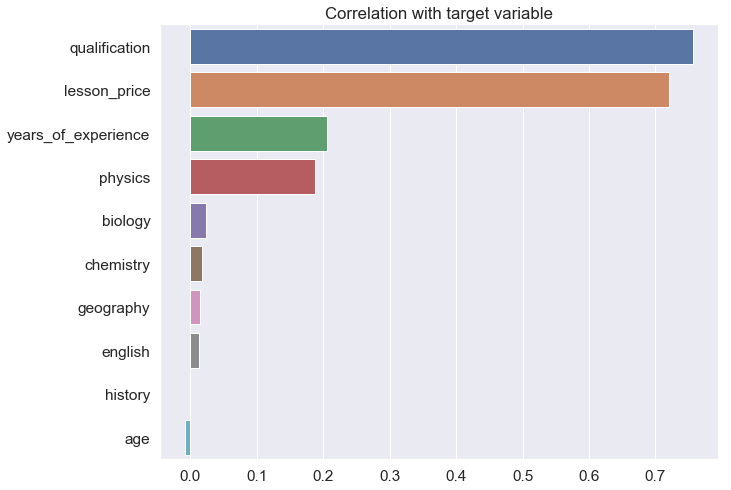

In [40]:
TARGET_NAME = 'mean_exam_points'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()
BASE_FEATURE_NAMES = BASE_FEATURE_NAMES[1:11]
print(BASE_FEATURE_NAMES)
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

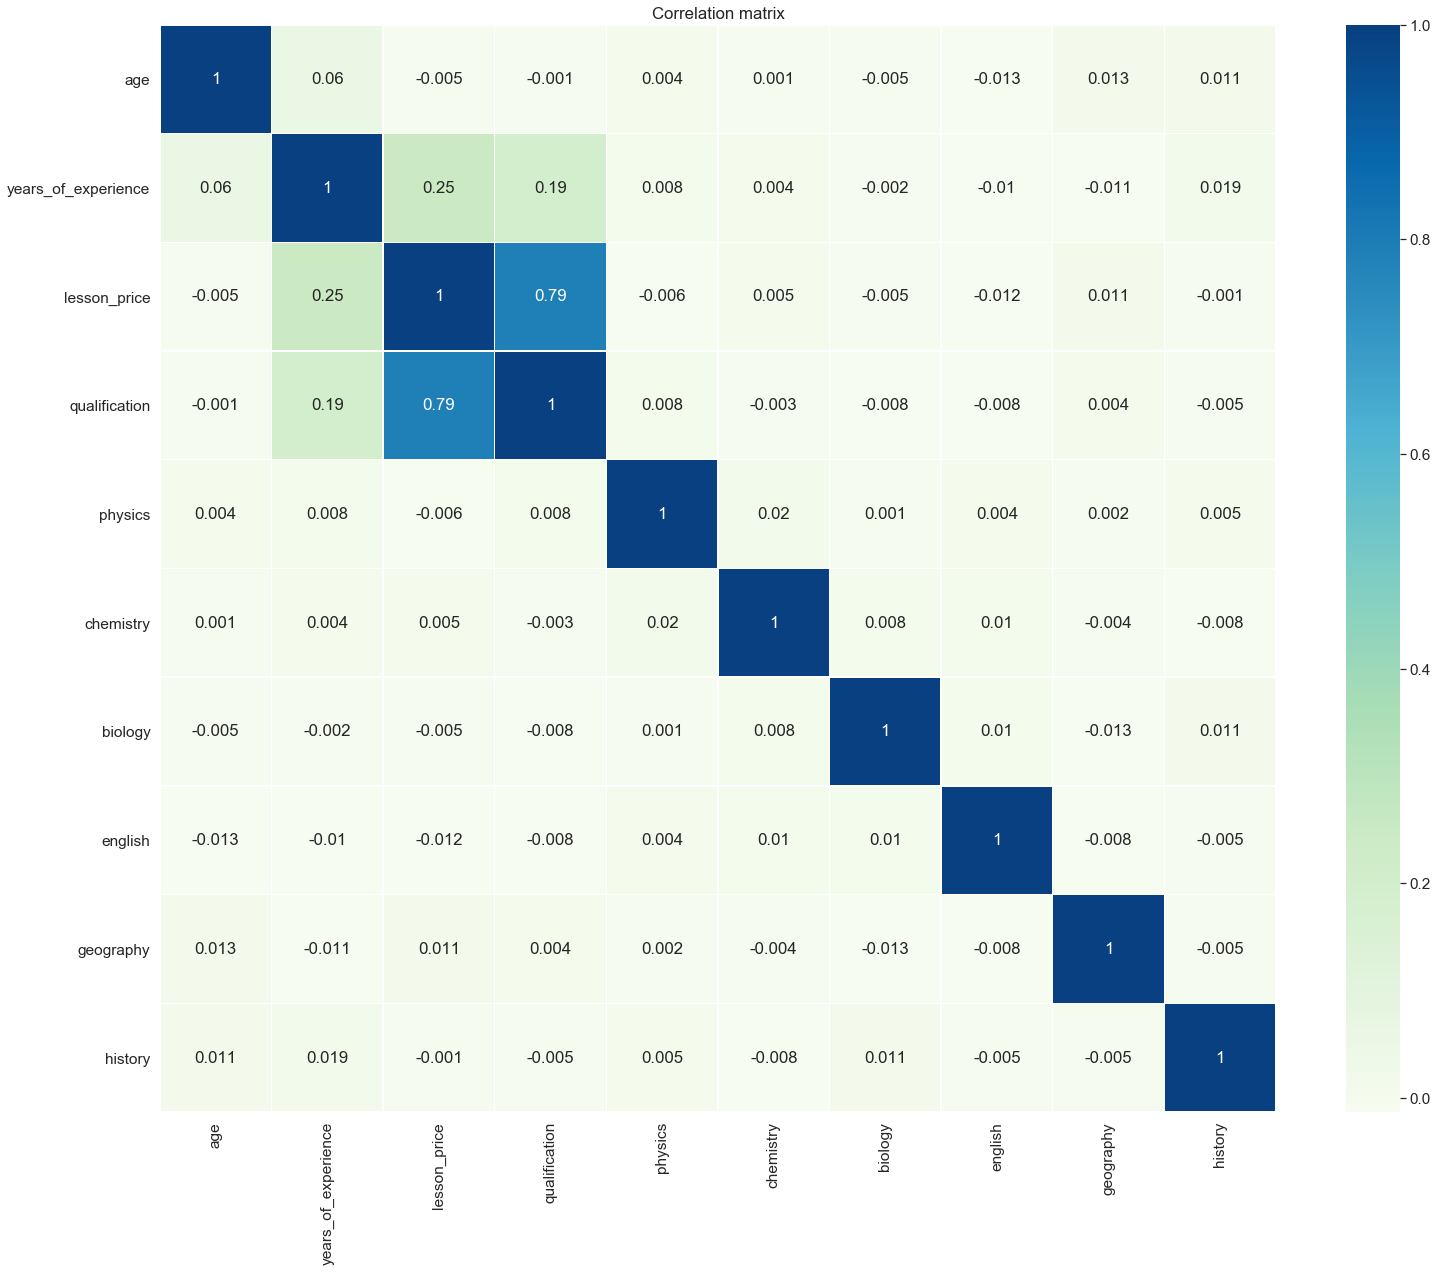

In [41]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

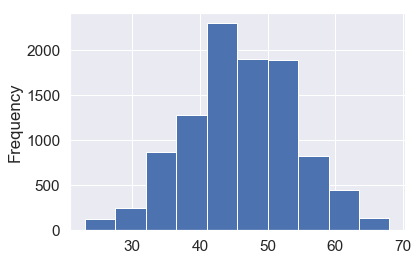

In [42]:
(df['age']).plot(kind="hist")

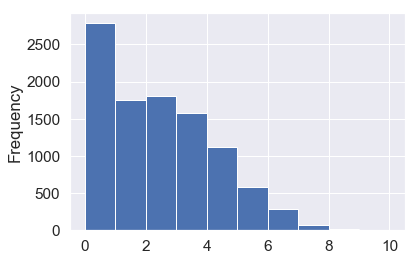

In [43]:
(df['years_of_experience']).plot(kind="hist")

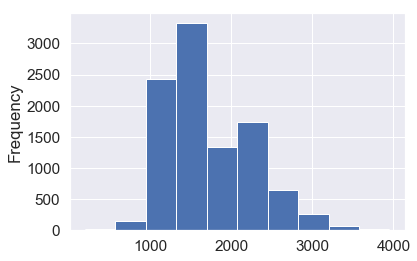

In [44]:
(df['lesson_price']).plot(kind="hist")

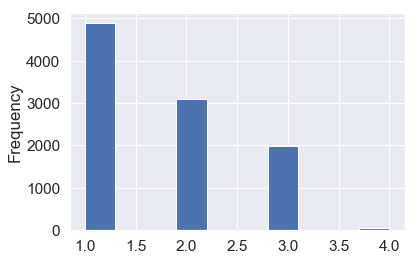

In [45]:
(df['qualification']).plot(kind="hist")

### Предобработка данных

Не обнаружено пропущенных значений и выбросов, но можно выбросить несколько признаков.А также сделать преобразования. Также не видно признаков, которые можно бы объединить для понижения размерности.

In [157]:
# Теперь приведём наши данные к формату np.array

FINAL_FEATURE_NAMES = BASE_FEATURE_NAMES[1:8]
X = df[FINAL_FEATURE_NAMES].values
y = df[TARGET_NAME].values
print(FINAL_FEATURE_NAMES)
print(X.shape, y.shape)

['years_of_experience', 'lesson_price', 'qualification', 'physics', 'chemistry', 'biology', 'english']
(10000, 7) (10000,)


In [158]:
df[FINAL_FEATURE_NAMES].head()

,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english
0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0
1,4.0,2850.0,3.0,1.0,0.0,0.0,0.0
2,0.0,1200.0,1.0,0.0,0.0,0.0,0.0
3,5.0,1400.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1500.0,1.0,0.0,0.0,0.0,0.0


### Нормализация  
забегая вперед,  нормализация price понизила оценку, поэтому отключил

In [138]:
'''
Xt = X.T
Xt[1] = (Xt[1] - Xt[1].min()) / (Xt[1].max() - Xt[1].min())
Xt[1]
X = Xt.T'''

array([0.35474132, 0.72165312, 0.3041328 , ..., 0.31678493, 0.27882854,
       0.36739345])

## Реализация градиентного бустинга

In [47]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле
        

In [48]:
 
# класс терминального узла (листа)
class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction_classification = self.predict()
        self.prediction_regression = self.predict_reg()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction  

    def predict_reg(self):
        #  найдем значение как среднее по выборке   
        prediction = np.mean(self.labels)
        return prediction  

In [193]:
# класс дерева
class Tree: 
    

    def __init__(self, max_depth=10):
        self.max_depth = max_depth
        self.tree = None

    # Расчёт дисперсии значений
    def dispersion(self, labels):
        return np.std(labels)

    # Расчет качества для задачи регрессии
    def quality_regression(self, left_labels, right_labels, current_dispersion):

        # доля выбоки, ушедшая в левое поддерево
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
        return current_dispersion - p * self.dispersion(left_labels) - (1 - p) * self.dispersion(right_labels)

    # Разбиение датасета в узле

    def split(self, data, labels, index, t):
    
        left = np.where(data[:, index] <= t)
        right = np.where(data[:, index] > t)
        
        true_data = data[left]
        false_data = data[right]
        true_labels = labels[left]
        false_labels = labels[right]
        
        return true_data, false_data, true_labels, false_labels

    
    # Нахождение наилучшего разбиения для задачи регрессии
    def find_best_split_regression(self, data, labels):
    
        #  обозначим минимальное количество объектов в узле
        min_leaf = 10

        current_dispersion = self.dispersion(labels)

        best_quality = 0
        best_t = None
        best_index = None
    
        n_features = data.shape[1]
    
        for index in range(n_features):
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique([row[index] for row in data])
        
            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < min_leaf or len(false_data) < min_leaf:
                    continue
            
                current_quality = self.quality_regression(true_labels, false_labels, current_dispersion)
            
                #  выбираем порог, на котором получается максимальный прирост качества
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index

        return best_quality, best_t, best_index

    
    # Построение дерева регрессии с помощью рекурсивной функции
    def build_tree_regression(self, data, labels, tree_depth=1, max_depth=10):

        quality, t, index = self.find_best_split_regression(data, labels)

        #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
        if quality == 0:
            return Leaf(data, labels)

        # Базовый случай (2) - прекращаем рекурсию, когда достигнута максимальная глубина дерева
        if tree_depth >= max_depth:
            return Leaf(data, labels)

        # Увеличиваем глубину дерева на 1
        tree_depth += 1

        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

        # Рекурсивно строим два поддерева
        true_branch = self.build_tree_regression(true_data, true_labels, tree_depth, max_depth)
        false_branch = self.build_tree_regression(false_data, false_labels, tree_depth, max_depth)

        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
        return Node(index, t, true_branch, false_branch)

    def predict_object(self, obj, node):

        #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, Leaf):
            answer = node.prediction_regression
            return answer

        if obj[node.index] <= node.t:
            return self.predict_object(obj, node.true_branch)
        else:
            return self.predict_object(obj, node.false_branch)

    def predict_value(self, data):
        val = []
        for obj in data:
            prediction = self.predict_object(obj, self.tree)
            val.append(prediction)
        return val

    def fit(self, data, labels):
        self.tree = self.build_tree_regression(data, labels, 0, self.max_depth)
        return self

In [50]:
class GradientBoosting:
    
    def __init__(self, n_trees, max_depth, coefs, eta):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.coefs = coefs
        self.eta = eta
        self.trees = []

    def bias(self, y, z):
        return (y - z)

    def fit(self, X_train, y_train):
    
        # Деревья будем записывать в список
        trees = []
    
        for i in range(self.n_trees):
            tree = Tree(max_depth=self.max_depth)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree.fit(X_train, y_train)
            else:
                # Получим ответы на текущей композиции
                target = self.predict(X_train)
            
                # алгоритмы начиная со второго обучаем на сдвиг
                bias = self.bias(y_train, target)
                tree.fit(X_train, bias)

            self.trees.append(tree)
        
        return self

    def predict(self, X):
        # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
        # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
        return np.array([sum([self.eta* coef * alg.predict_value([x])[0] for alg, coef in zip(self.trees, self.coefs)]) for x in X])

In [51]:
def r_2(y_pred, y_true):
    numerator = ((y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
    denominator = ((y_true - np.average(y_true)) ** 2).sum(axis=0,
                                                          dtype=np.float64)
    return 1 - (numerator / denominator)

In [185]:
''' 
Разбиение на обучающий и валидационный датасеты
to_choice = list(range(X.shape[0]))
np.random.seed(seed=42)
train_ids = np.random.choice(to_choice, size=int(0.7*len(to_choice)))
train_data = X[train_ids]
train_labels = y[train_ids]
train_data.insert(train_labels)
print(len(train_data))
#print(train_data)
# Получим ответы на текущей выбранной композиции
#target = gb_predict(X_train[ids], trees, coefs, eta)
     
train_data, test_data, train_labels, test_labels = train_test_split(X, y, 
                                                                    test_size = 0.3,
                                                                    random_state = 1)'''  
                                                                    

' \nРазбиение на обучающий и валидационный датасеты\nto_choice = list(range(X.shape[0]))\nnp.random.seed(seed=42)\ntrain_ids = np.random.choice(to_choice, size=int(0.7*len(to_choice)))\ntrain_data = X[train_ids]\ntrain_labels = y[train_ids]\ntrain_data.insert(train_labels)\nprint(len(train_data))\n#print(train_data)\n# Получим ответы на текущей выбранной композиции\n#target = gb_predict(X_train[ids], trees, coefs, eta)\n     \ntrain_data, test_data, train_labels, test_labels = train_test_split(X, y, \n                                                                    test_size = 0.3,\n                                                                    random_state = 1)'

In [190]:
# Число деревьев в ансамбле
n_trees = 20

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 5

# Шаг
eta = 1

train_data, test_data, train_labels, test_labels = train_test_split(X, y, 
                                                                    test_size = 0.3,
                                                                    random_state = 100)

In [194]:
gb = GradientBoosting(n_trees, max_depth, coefs, eta)
gb.fit(train_data, train_labels)
train_answers = gb.predict(train_data)
test_answers = gb.predict(test_data)

In [195]:
r_2(test_answers, test_labels)

0.786551544741422

In [180]:
#Обучение на полной выборке
gb_final = GradientBoosting(n_trees, max_depth, coefs, eta)
gb_final.fit(X, y)

### Предсказания для тестового датасета

In [145]:
X_test = df_test[FINAL_FEATURE_NAMES].values
'''
Xt = X_test.T
Xt[1] = (Xt[1] - Xt[1].min()) / (Xt[1].max() - Xt[1].min())
Xt[1]
X_test = Xt.T'''

'\nXt = X_test.T\nXt[1] = (Xt[1] - Xt[1].min()) / (Xt[1].max() - Xt[1].min())\nXt[1]\nX_test = Xt.T'

In [181]:
test_pred = gb_final.predict(X_test)
print(test_pred)

[55.63475485 62.02798442 50.07671613 ... 54.21761311 64.98201711
 70.36659992]


In [183]:
submissions = pd.concat([df_test['Id'], pd.Series(test_pred)], axis=1)
submissions = submissions.rename(columns={0: 'mean_exam_points'})

In [184]:
submissions.to_csv('EMikhachev_predictions.csv',index=None)

In [ ]:
# Итоговый результат 0.78136